# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy


  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675970 sha256=c99789aff57c3831e2aee6bab8ce742b09f441c51d8de151e451c2f6d3705788
  Stored in directory: c:\users\jduck\appdata\local\pip\cache\wheels\ca\bd\d1\2bee2b54030fe2e29a1a6a7b10e6781aff17bdff423fc401d6
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


In [3]:

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 988


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=71a8c9ee500e9b4abfacdd7546bf22e4&units=metric&q=


In [5]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | praia da vitoria
Processing Record 5 of Set 1 | pacora
Processing Record 6 of Set 1 | nemuro
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | wangqing
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | mobaye
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | ouadda
Processing Record 15 of Set 1 | sunland park
Processing Record 16 of Set 1 | deschutes river woods
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | kogalym
Processing Record 19 of Set 1 | soio
Processing Record 20 of Set 1 | ladario
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | barga

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          947
Lat           947
Lng           947
Max Temp      947
Humidity      947
Cloudiness    947
Wind Speed    947
Country       947
Date          947
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.23,91,100,12.32,TF,1686589919
1,waitangi,-43.9535,-176.5597,9.34,77,100,9.19,NZ,1686589726
2,whitehorse,60.7161,-135.0538,13.90,53,66,4.47,CA,1686589758
3,praia da vitoria,38.7333,-27.0667,21.14,100,75,5.21,PT,1686589920
4,pacora,9.0833,-79.2833,33.45,66,40,2.57,PA,1686589920


In [9]:
# Export the City_Data into a csv
import os
os.makedirs("output_data")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.23,91,100,12.32,TF,1686589919
1,waitangi,-43.9535,-176.5597,9.34,77,100,9.19,NZ,1686589726
2,whitehorse,60.7161,-135.0538,13.90,53,66,4.47,CA,1686589758
3,praia da vitoria,38.7333,-27.0667,21.14,100,75,5.21,PT,1686589920
4,pacora,9.0833,-79.2833,33.45,66,40,2.57,PA,1686589920


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

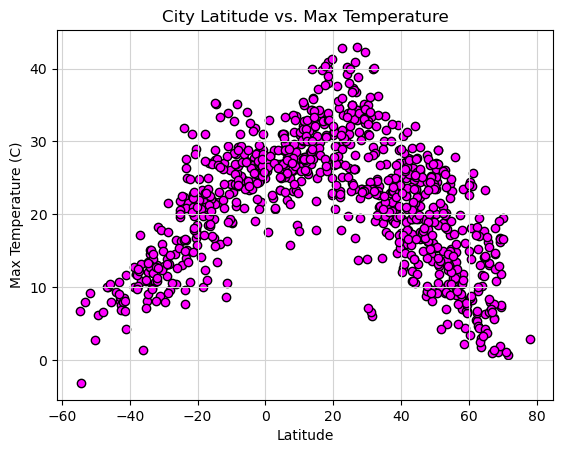

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolors = "magenta", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

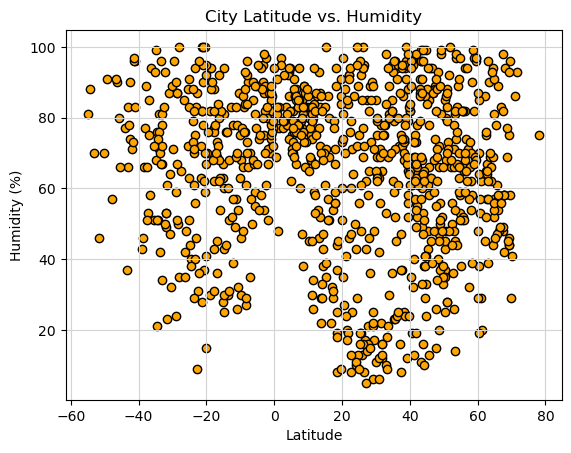

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black", facecolors = "orange")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

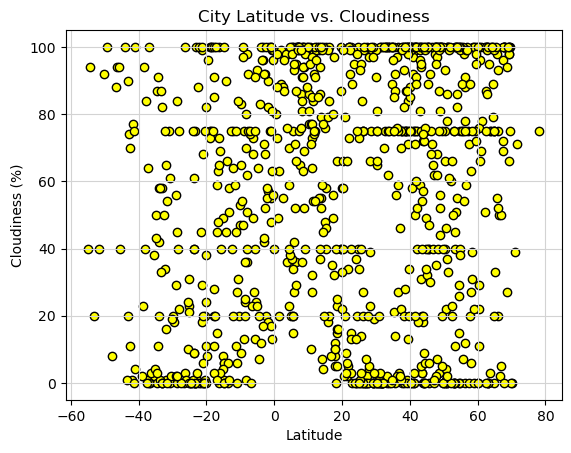

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolors = "yellow", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

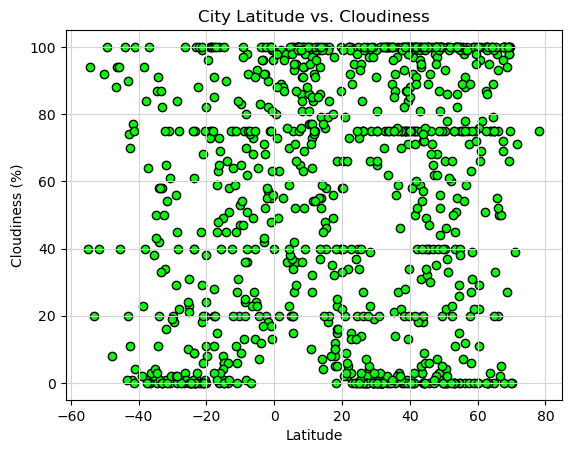

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black", facecolors = "lime")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regression_values, "r-")
    
    
    print(f"The r-value is : {rvalue ** 2}")
    return line_eq

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,whitehorse,60.7161,-135.0538,13.90,53,66,4.47,CA,1686589758
3,praia da vitoria,38.7333,-27.0667,21.14,100,75,5.21,PT,1686589920
4,pacora,9.0833,-79.2833,33.45,66,40,2.57,PA,1686589920
5,nemuro,43.3236,145.5750,10.83,99,94,3.31,JP,1686589920
7,wangqing,43.3218,129.7634,12.29,96,31,0.53,CN,1686589921


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.23,91,100,12.32,TF,1686589919
1,waitangi,-43.9535,-176.5597,9.34,77,100,9.19,NZ,1686589726
6,port mathurin,-19.6833,63.4167,24.89,70,8,8.46,MU,1686589920
12,ushuaia,-54.8000,-68.3000,6.79,81,40,18.01,AR,1686589922
18,soio,-6.1349,12.3689,23.64,85,49,4.09,AO,1686589923


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6935176482624441


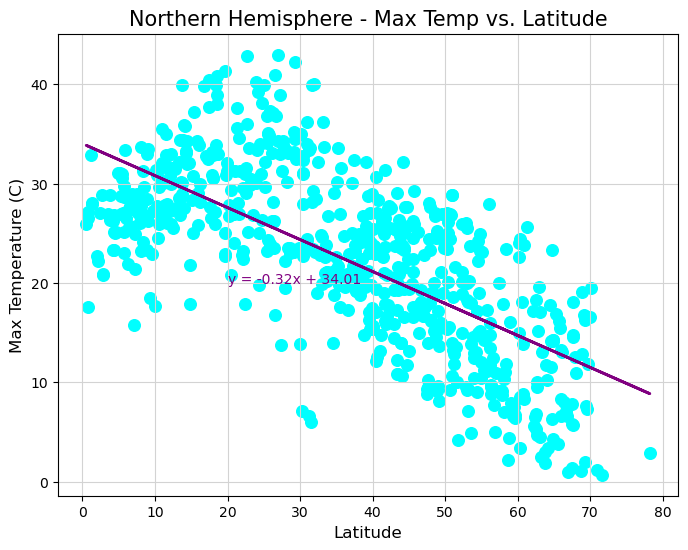

In [51]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(8,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = 'o', color = 'cyan', s = [70])
plt.plot(x_values, regress_values, 'purple', linewidth = 2)

plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize = 15)
plt.ylabel('Max Temperature (C)', fontsize = 12, color = 'black')
plt.xlabel('Latitude', fontsize = 12, color = 'black')
plt.grid (visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")
plt.annotate(line_eq, (20, 20), fontsize = 10, color = 'purple')

print(f'The r-value is: {rvalue}')

plt.savefig("output_data/Fig5.png")

plt.show()



The r-value is: 0.8158805041168139


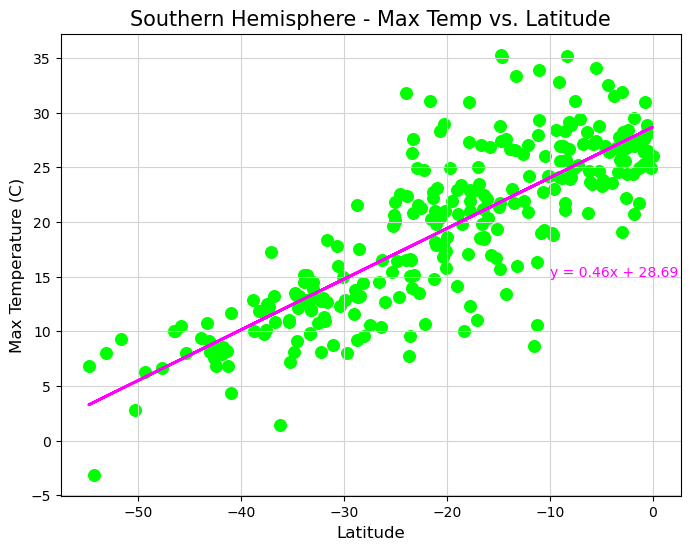

In [58]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(8,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = 'o', color = 'lime', s = [70])
plt.plot(x_values, regress_values, 'magenta', linewidth = 2)

plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize = 15)
plt.ylabel('Max Temperature (C)', fontsize = 12, color = 'black')
plt.xlabel('Latitude', fontsize = 12, color = 'black')
plt.annotate(line_eq, (-10, 15), fontsize = 10, color = 'magenta')
plt.grid (visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")

print(f'The r-value is: {rvalue}')

plt.savefig("output_data/Fig6.png")

plt.show()



**Discussion about the linear relationship:** There is a moderate correlation here, approximately 69-82% fit.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.06479835572447816


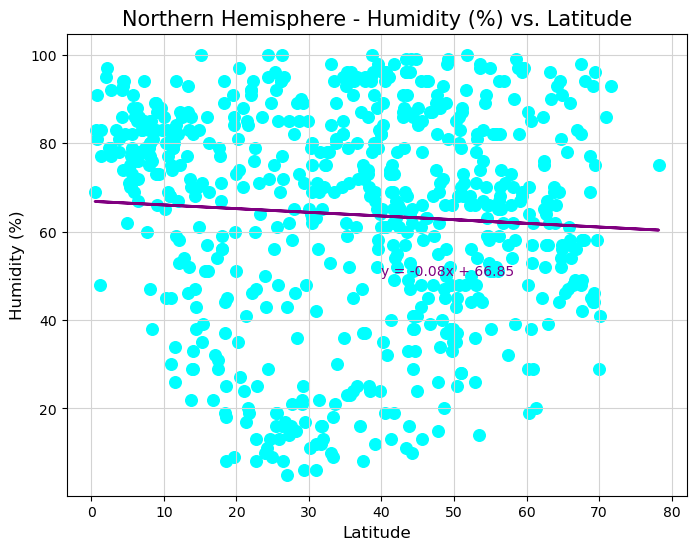

In [52]:
# Northern Hemisphere
plt.figure(figsize=(8,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = 'o', color = 'cyan', s = [70])
plt.plot(x_values, regress_values, 'purple', linewidth = 2)

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize = 15)
plt.ylabel('Humidity (%)', fontsize = 12, color = 'black')
plt.xlabel('Latitude', fontsize = 12, color = 'black')
plt.grid (visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")
plt.annotate(line_eq, (40, 50), fontsize = 10, color = 'purple')

print(f'The r-value is: {rvalue}')

plt.savefig("output_data/Fig7.png")

plt.show()


The r-value is: 0.050620016484047


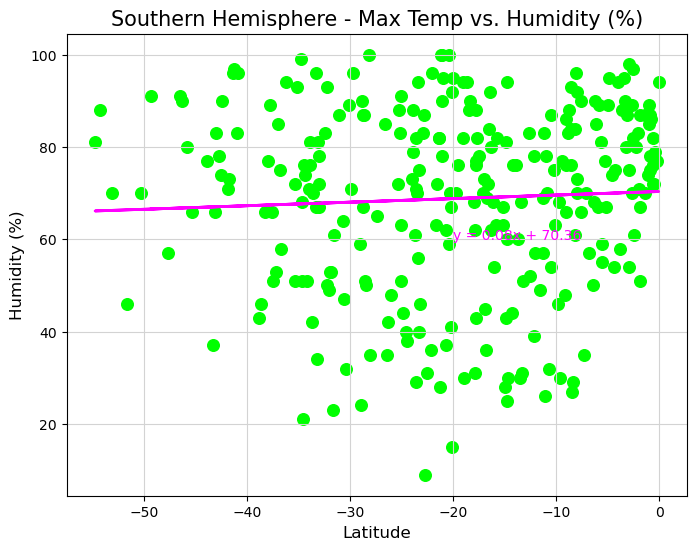

In [48]:
# Southern Hemisphere
plt.figure(figsize=(8,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = 'o', color = 'lime', s = [70])
plt.plot(x_values, regress_values, 'magenta', linewidth = 2)

plt.title('Southern Hemisphere - Max Temp vs. Humidity (%)', fontsize = 15)
plt.ylabel('Humidity (%)', fontsize = 12, color = 'black')
plt.xlabel('Latitude', fontsize = 12, color = 'black')
plt.annotate(line_eq, (-20, 60), fontsize = 10, color = 'magenta')
plt.grid (visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")

print(f'The r-value is: {rvalue}')

plt.savefig("output_data/Fig8.png")

plt.show()

**Discussion about the linear relationship:** There is almost no correlation between latitude and humidity. The r value is close to zero for both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0167358405195784


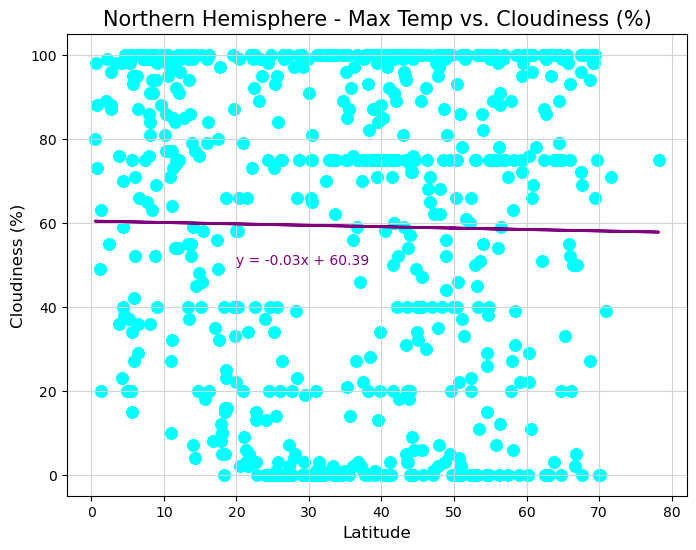

In [55]:
# Northern Hemisphere
plt.figure(figsize=(8,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = 'o', color = 'cyan', s = [70])
plt.plot(x_values, regress_values, 'purple', linewidth = 2)

plt.title('Northern Hemisphere - Max Temp vs. Cloudiness (%)', fontsize = 15)
plt.ylabel('Cloudiness (%)', fontsize = 12, color = 'black')
plt.xlabel('Latitude', fontsize = 12, color = 'black')
plt.grid (visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")
plt.annotate(line_eq, (20, 50), fontsize = 10, color = 'purple')

print(f'The r-value is: {rvalue}')

plt.savefig("output_data/Fig9.png")

plt.show()


The r-value is: 0.16350273856761727


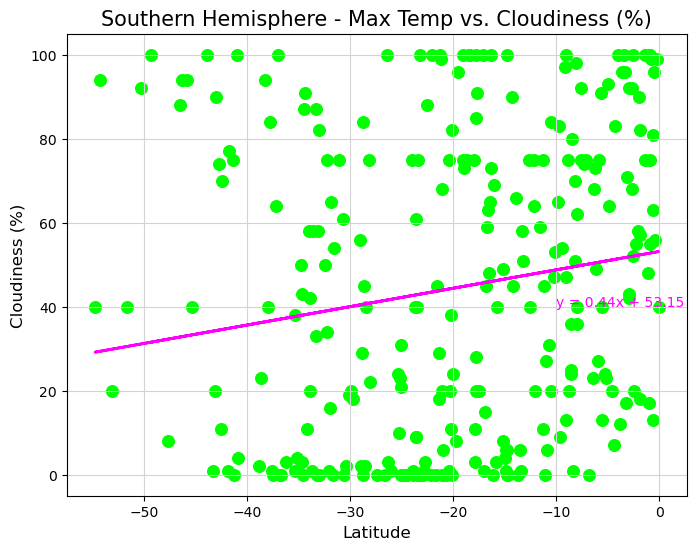

In [57]:
# Southern Hemisphere
plt.figure(figsize=(8,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = 'o', color = 'lime', s = [70])
plt.plot(x_values, regress_values, 'magenta', linewidth = 2)

plt.title('Southern Hemisphere - Max Temp vs. Cloudiness (%)', fontsize = 15)
plt.ylabel('Cloudiness (%)', fontsize = 12, color = 'black')
plt.xlabel('Latitude', fontsize = 12, color = 'black')
plt.annotate(line_eq, (-10, 40), fontsize = 10, color = 'magenta')
plt.grid (visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")

print(f'The r-value is: {rvalue}')

plt.savefig("output_data/Fig10.png")

plt.show()

**Discussion about the linear relationship:** There is almost no correllation between cloudiness and latitude in the northern hemisphere. The r value is close to zero. There is a very weak correlation for the southern hemisphere, about 16%. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05568763111797599


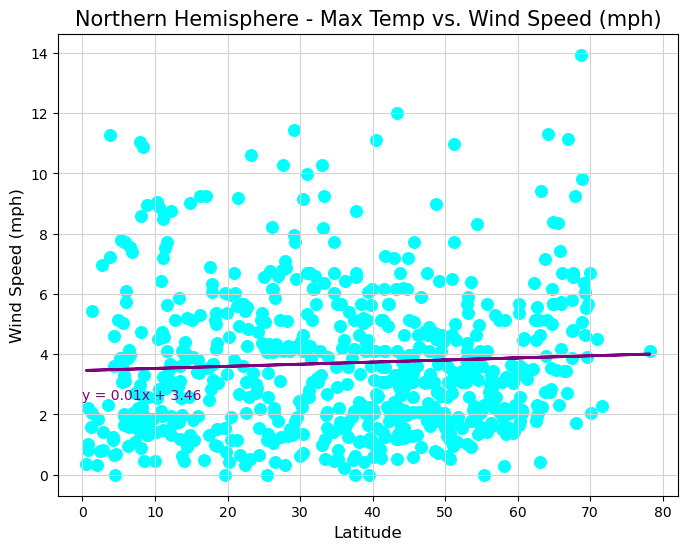

In [60]:
# Northern Hemisphere
plt.figure(figsize=(8,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = 'o', color = 'cyan', s = [70])
plt.plot(x_values, regress_values, 'purple', linewidth = 2)

plt.title('Northern Hemisphere - Max Temp vs. Wind Speed (mph)', fontsize = 15)
plt.ylabel('Wind Speed (mph)', fontsize = 12, color = 'black')
plt.xlabel('Latitude', fontsize = 12, color = 'black')
plt.grid (visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")
plt.annotate(line_eq, (0, 2.5), fontsize = 10, color = 'purple')

print(f'The r-value is: {rvalue}')

plt.savefig("output_data/Fig11.png")

plt.show()


The r-value is: -0.23728809749372398


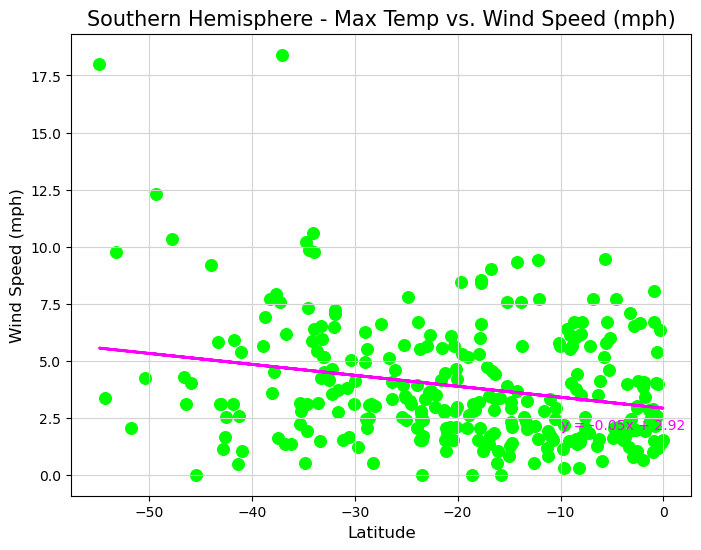

In [62]:
# Southern Hemisphere
plt.figure(figsize=(8,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = 'o', color = 'lime', s = [70])
plt.plot(x_values, regress_values, 'magenta', linewidth = 2)

plt.title('Southern Hemisphere - Max Temp vs. Wind Speed (mph)', fontsize = 15)
plt.ylabel('Wind Speed (mph)', fontsize = 12, color = 'black')
plt.xlabel('Latitude', fontsize = 12, color = 'black')
plt.annotate(line_eq, (-10, 2), fontsize = 10, color = 'magenta')
plt.grid (visible = True, which = "major", axis = "both", linestyle = "-", color = "lightgrey")

print(f'The r-value is: {rvalue}')

plt.savefig("output_data/Fig12.png")

plt.show()

**Discussion about the linear relationship:** Even though, visually, it looks like there could be some correllation between latitude and wind speed (the values seem to be somewhat clustered around the line), the r-values indicate otherwise. There is only a 5% to 20% correllation.